In [1]:
import pandas as pd

import json

import requests

In [2]:
airfare_price = "Resources/23100237-eng-airfare-quarterly/23100237.csv"

In [3]:
airfare_price = pd.read_csv(airfare_price)
airfare_price

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1983-01,Canada,2016A000011124,Dollars,81,units,0,v812690,1,119.8,NaN,NaN,NaN,2
1,1983-01,Halifax,NaN,Dollars,81,units,0,v812700,2,115.8,NaN,NaN,NaN,2
2,1983-01,Montréal,NaN,Dollars,81,units,0,v812699,3,109.2,NaN,NaN,NaN,2
3,1983-01,Ottawa,NaN,Dollars,81,units,0,v812698,4,107.9,NaN,NaN,NaN,2
4,1983-01,Toronto,NaN,Dollars,81,units,0,v812697,5,137.7,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,2019-04,Saskatoon,NaN,Dollars,81,units,0,v812695,7,163.5,NaN,NaN,NaN,2
1602,2019-04,Regina,NaN,Dollars,81,units,0,v812694,8,168.9,NaN,NaN,NaN,2
1603,2019-04,Calgary,NaN,Dollars,81,units,0,v812693,9,162.5,NaN,NaN,NaN,2
1604,2019-04,Edmonton,NaN,Dollars,81,units,0,v812692,10,163.1,NaN,NaN,NaN,2


In [4]:
airfare_price[["Year","Quarter"]] = airfare_price.REF_DATE.str.split("-", expand = True)

airfare_price_cleaned = airfare_price[["Year","Quarter","GEO","VALUE","UOM"]]

airfare_price_cleaned

,Year,Quarter,GEO,VALUE,UOM
0,1983,01,Canada,119.8,Dollars
1,1983,01,Halifax,115.8,Dollars
2,1983,01,Montréal,109.2,Dollars
3,1983,01,Ottawa,107.9,Dollars
4,1983,01,Toronto,137.7,Dollars
...,...,...,...,...,...
1601,2019,04,Saskatoon,163.5,Dollars
1602,2019,04,Regina,168.9,Dollars
1603,2019,04,Calgary,162.5,Dollars
1604,2019,04,Edmonton,163.1,Dollars


In [5]:
airfare_price_cleaned = airfare_price_cleaned.rename(columns={"GEO":"City", "VALUE":"Avg Price", "UOM":"Currency"})

In [6]:
airfare_price_cleaned = airfare_price_cleaned.replace({"01":1 , "04":2 , "07":3 , "10":4})

In [7]:
# converting "Year" values to integer

airfare_price_cleaned["Year"] = airfare_price_cleaned["Year"].astype(int)

In [8]:
# filtering the dataset only for the required cities and period range (2015 to 2019)

cities_filtered = airfare_price_cleaned.loc[(((airfare_price_cleaned["City"] == "Toronto") |\
                                             (airfare_price_cleaned["City"] == "Vancouver") |\
                                             (airfare_price_cleaned["City"] == "Montréal") |\
                                             (airfare_price_cleaned["City"] == "Halifax")) &\
                                             (airfare_price_cleaned["Year"] >= 2015)), :]


In [42]:
cities_filtered

,Year,Quarter,City,Avg Price,Currency
1409,2015,1,Halifax,192.1,Dollars
1410,2015,1,Montréal,176.3,Dollars
1412,2015,1,Toronto,215.1,Dollars
1418,2015,1,Vancouver,201.2,Dollars
1420,2015,2,Halifax,170.2,Dollars
...,...,...,...,...,...
1594,2019,1,Vancouver,190.0,Dollars
1596,2019,2,Halifax,167.9,Dollars
1597,2019,2,Montréal,175.6,Dollars
1599,2019,2,Toronto,203.2,Dollars


In [9]:
# grouping data by City and Quarter

avg_airfare = cities_filtered.groupby(by=["City","Quarter"]).mean()

In [10]:
avg_airfare = avg_airfare["Avg Price"]

In [11]:
avg_airfare = pd.DataFrame(avg_airfare)

avg_airfare

Avg Price
City      Quarter           
Halifax   1          164.460
          2          158.400
          3          172.075
          4          157.525
Montréal  1          165.840
          2          167.500
          3          161.200
          4          165.625
Toronto   1          198.720
          2          194.320
          3          192.450
          4          194.325
Vancouver 1          191.960
          2          191.720
          3          198.075
          4          189.625

In [12]:
dataframe = avg_airfare.reset_index()

dataframe = pd.DataFrame(dataframe)

In [13]:
import matplotlib.pyplot as plt

In [14]:
x_values = dataframe["Quarter"]

In [15]:
y_values = dataframe["Avg Price"]

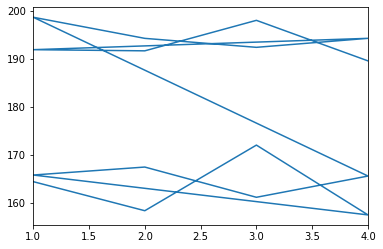

In [44]:
plt.plot(x_values, y_values)

plt.xlim(1, 4)

plt.show()

In [17]:
halifax = dataframe.loc[(dataframe["City"] == "Halifax"), :]

In [18]:
halifax

,City,Quarter,Avg Price
0,Halifax,1,164.460
1,Halifax,2,158.400
2,Halifax,3,172.075
3,Halifax,4,157.525


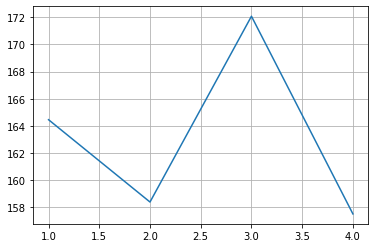

In [19]:
plt.plot(halifax["Quarter"], halifax["Avg Price"])

plt.grid()

plt.show()

In [20]:
airfare_class = "Resources/23100036-eng/23100036.csv"

In [21]:
airfare_class_df = pd.read_csv(airfare_class)

airfare_class_df.head()

,REF_DATE,GEO,DGUID,Sector,Fare type group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007-01,Canada,2016A000011124,Domestic and international,All fare groups,Dollars,81,units,0,v53508617,1.1.1,238.0,NaN,NaN,NaN,2
1,2007-01,Canada,2016A000011124,Domestic and international,Business class,Dollars,81,units,0,v53508618,1.1.2,2398.3,E,NaN,t,2
2,2007-01,Canada,2016A000011124,Domestic and international,Economy,Dollars,81,units,0,v53508619,1.1.3,252.8,NaN,NaN,t,2
3,2007-01,Canada,2016A000011124,Domestic and international,Discounted,Dollars,81,units,0,v53508620,1.1.4,238.1,NaN,NaN,t,2
4,2007-01,Canada,2016A000011124,Domestic and international,Other fares,Dollars,81,units,0,v53508621,1.1.5,87.3,E,NaN,t,2


In [22]:
airfare_class_df[["Year","Quarter"]] = airfare_class_df.REF_DATE.str.split("-", expand = True)

airfare_class_cleaned = airfare_class_df[["Year","Quarter","Sector","Fare type group", "VALUE", "UOM"]]

airfare_class_cleaned

,Year,Quarter,Sector,Fare type group,VALUE,UOM
0,2007,01,Domestic and international,All fare groups,238.0,Dollars
1,2007,01,Domestic and international,Business class,2398.3,Dollars
2,2007,01,Domestic and international,Economy,252.8,Dollars
3,2007,01,Domestic and international,Discounted,238.1,Dollars
4,2007,01,Domestic and international,Other fares,87.3,Dollars
...,...,...,...,...,...,...
1205,2019,04,Domestic and international,All fare groups,239.3,Dollars
1206,2019,04,Domestic,All fare groups,176.6,Dollars
1207,2019,04,Short-haul,All fare groups,125.8,Dollars
1208,2019,04,Long-haul,All fare groups,224.5,Dollars


In [23]:
airfare_class_cleaned = airfare_class_cleaned.rename(columns={"Fare type group":"Fare Type", "VALUE":"Avg Price", "UOM":"Currency"})

airfare_class_cleaned

,Year,Quarter,Sector,Fare Type,Avg Price,Currency
0,2007,01,Domestic and international,All fare groups,238.0,Dollars
1,2007,01,Domestic and international,Business class,2398.3,Dollars
2,2007,01,Domestic and international,Economy,252.8,Dollars
3,2007,01,Domestic and international,Discounted,238.1,Dollars
4,2007,01,Domestic and international,Other fares,87.3,Dollars
...,...,...,...,...,...,...
1205,2019,04,Domestic and international,All fare groups,239.3,Dollars
1206,2019,04,Domestic,All fare groups,176.6,Dollars
1207,2019,04,Short-haul,All fare groups,125.8,Dollars
1208,2019,04,Long-haul,All fare groups,224.5,Dollars


In [24]:
airfare_class_cleaned = airfare_class_cleaned.replace({"01":1 , "04":2 , "07":3 , "10":4})

In [25]:
# converting "Year" values to integer

airfare_class_cleaned["Year"] = airfare_class_cleaned["Year"].astype(int)

In [26]:
airfare_class_cleaned["Sector"].value_counts()

Long-haul                     242
Short-haul                    242
Domestic                      242
Domestic and international    242
International                 242
Name: Sector, dtype: int64

In [27]:
airfare_class_cleaned["Fare Type"].value_counts()

All fare groups    250
Business class     240
Economy            240
Discounted         240
Other fares        240
Name: Fare Type, dtype: int64

In [28]:
# filtering the dataset only for the required cities and period range (2015 to 2019)

airfares_filtered = airfare_class_cleaned.loc[((airfare_class_cleaned["Sector"] == "Domestic") &\
                                               ((airfare_class_cleaned["Fare Type"] == "Discounted") |\
                                                (airfare_class_cleaned["Fare Type"] == "Other fares") |\
                                               (airfare_class_cleaned["Fare Type"] == "Economy")) &\
                                               (airfare_class_cleaned["Year"] >= 2015)), :]


airfares_filtered

,Year,Quarter,Sector,Fare Type,Avg Price,Currency
807,2015,1,Domestic,Economy,NaN,Dollars
808,2015,1,Domestic,Discounted,180.3,Dollars
809,2015,1,Domestic,Other fares,173.6,Dollars
832,2015,2,Domestic,Economy,272.0,Dollars
833,2015,2,Domestic,Discounted,172.5,Dollars
834,2015,2,Domestic,Other fares,164.5,Dollars
857,2015,3,Domestic,Economy,285.5,Dollars
858,2015,3,Domestic,Discounted,174.1,Dollars
859,2015,3,Domestic,Other fares,188.3,Dollars
882,2015,4,Domestic,Economy,279.0,Dollars


In [29]:
airfares_filtered["Fare Type"].value_counts()

Economy        16
Other fares    16
Discounted     16
Name: Fare Type, dtype: int64

In [30]:
airfares_valid = airfares_filtered.dropna(how="any")

airfares_valid

,Year,Quarter,Sector,Fare Type,Avg Price,Currency
808,2015,1,Domestic,Discounted,180.3,Dollars
809,2015,1,Domestic,Other fares,173.6,Dollars
832,2015,2,Domestic,Economy,272.0,Dollars
833,2015,2,Domestic,Discounted,172.5,Dollars
834,2015,2,Domestic,Other fares,164.5,Dollars
857,2015,3,Domestic,Economy,285.5,Dollars
858,2015,3,Domestic,Discounted,174.1,Dollars
859,2015,3,Domestic,Other fares,188.3,Dollars
882,2015,4,Domestic,Economy,279.0,Dollars
883,2015,4,Domestic,Discounted,172.5,Dollars


In [31]:
airfares_grouped = airfares_valid.groupby(by=["Quarter"]).mean()

In [32]:
airfares_grouped = airfares_grouped["Avg Price"]

In [33]:
dataframe2 = airfares_grouped.reset_index()

dataframe2 = pd.DataFrame(dataframe2)

In [34]:
dataframe2

,Quarter,Avg Price
0,1,183.880000
1,2,204.958333
2,3,208.954545
3,4,188.754545


In [35]:
merged_df = pd.merge(dataframe, dataframe2, on="Quarter", how="inner")

In [36]:
merged_df

,City,Quarter,Avg Price_x,Avg Price_y
0,Halifax,1,164.460,183.880000
1,Montréal,1,165.840,183.880000
2,Toronto,1,198.720,183.880000
3,Vancouver,1,191.960,183.880000
4,Halifax,2,158.400,204.958333
5,Montréal,2,167.500,204.958333
6,Toronto,2,194.320,204.958333
7,Vancouver,2,191.720,204.958333
8,Halifax,3,172.075,208.954545
9,Montréal,3,161.200,208.954545


In [37]:
dataframe_renamed = merged_df.rename(columns={"Avg Price_x":"Avg Price (per city)", "Avg Price_y":"CAN Avg Price (economy)"})

dataframe_renamed

,City,Quarter,Avg Price (per city),CAN Avg Price (economy)
0,Halifax,1,164.460,183.880000
1,Montréal,1,165.840,183.880000
2,Toronto,1,198.720,183.880000
3,Vancouver,1,191.960,183.880000
4,Halifax,2,158.400,204.958333
5,Montréal,2,167.500,204.958333
6,Toronto,2,194.320,204.958333
7,Vancouver,2,191.720,204.958333
8,Halifax,3,172.075,208.954545
9,Montréal,3,161.200,208.954545


In [38]:
dataframe_grouped = dataframe_renamed.groupby(by=["City","Quarter"]).mean()

In [39]:
df = pd.DataFrame(dataframe_grouped)

In [40]:
df = df.round(decimals=2)

In [41]:
df

Avg Price (per city)  CAN Avg Price (economy)
City      Quarter                                               
Halifax   1                      164.46                   183.88
          2                      158.40                   204.96
          3                      172.08                   208.95
          4                      157.52                   188.75
Montréal  1                      165.84                   183.88
          2                      167.50                   204.96
          3                      161.20                   208.95
          4                      165.62                   188.75
Toronto   1                      198.72                   183.88
          2                      194.32                   204.96
          3                      192.45                   208.95
          4                      194.32                   188.75
Vancouver 1                      191.96                   183.88
          2                      191.72                   204.96
          3                      198.08                   208.95
          4                      189.62                   188.75